In [1]:
! ls 

drive  sample_data


In [2]:
# importing pipelines 
from drive.MyDrive.yield_gen import * 
from drive.MyDrive.evaluation import * 

In [3]:
# yield generators 

a_train, a_valid, a_test = generator(gen_type="with-aug", host="colab")

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


## DenseNet121

In [4]:
from tensorflow.keras.applications import DenseNet121

In [5]:
a_train.image_shape

(256, 256, 3)

In [6]:
dense = DenseNet121(include_top=False, weights='imagenet', input_shape=a_train.image_shape)

29089792/29084464 [==============================] - 0s 0us/step


In [7]:
# Freezing the Weights
for layer in dense.layers:
    layer.trainable = False

In [8]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [10]:

# Custom Output
model = Sequential()
model.add(dense)
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16777472  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 23,831,619
Trainable params: 16,794,115
Non-trainable params: 7,037,504
__________________________________

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
#callbacks 
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=3)

In [14]:
import time

start = time.perf_counter()

perf = model.fit_generator(a_train, epochs=15, callbacks=[early_stop],validation_data=a_valid)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
42/42 [==============================] - 647s 15s/step - loss: 2.9179 - accuracy: 0.7300 - val_loss: 0.5071 - val_accuracy: 0.8381
Epoch 2/15
42/42 [==============================] - 200s 5s/step - loss: 0.3541 - accuracy: 0.8759 - val_loss: 0.2657 - val_accuracy: 0.9143
Epoch 3/15
42/42 [==============================] - 199s 5s/step - loss: 0.2278 - accuracy: 0.9085 - val_loss: 0.3246 - val_accuracy: 0.9238
Epoch 4/15
42/42 [==============================] - 200s 5s/step - loss: 0.1864 - accuracy: 0.9410 - val_loss: 0.2595 - val_accuracy: 0.9429
Epoch 5/15
42/42 [==============================] - 200s 5s/step - loss: 0.2057 - accuracy: 0.9334 - val_loss: 0.2248 - val_accuracy: 0.9048
Epoch 6/15
42/42 [==============================] - 198s 5s/step - loss: 0.1150 - accuracy: 0.9607 - val_loss: 0.4203 - val_accuracy: 0.9238
Epoch 7/15
42/42 [==============================] - 199s 5s/step - loss: 0.1133 - accuracy: 0.9614 - val_loss: 0.2940 - val_accuracy: 0.9333
Elapsed 30.9

In [15]:
import pandas as pd 
histdata = pd.DataFrame(perf.history)

In [16]:
histdata

,loss,accuracy,val_loss,val_accuracy
0,2.917913,0.729955,0.507137,0.838095
1,0.354136,0.875946,0.265738,0.914286
2,0.227824,0.908472,0.324628,0.923810
3,0.186384,0.940998,0.259523,0.942857
4,0.205663,0.933434,0.224752,0.904762
5,0.115043,0.960666,0.420336,0.923810
6,0.113323,0.961422,0.293960,0.933333


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy - 91.43%
validation loss - 0.34
Test Accuracy - 97.14%
Test loss - 0.14
preserving records
DenseNet121 Records Created


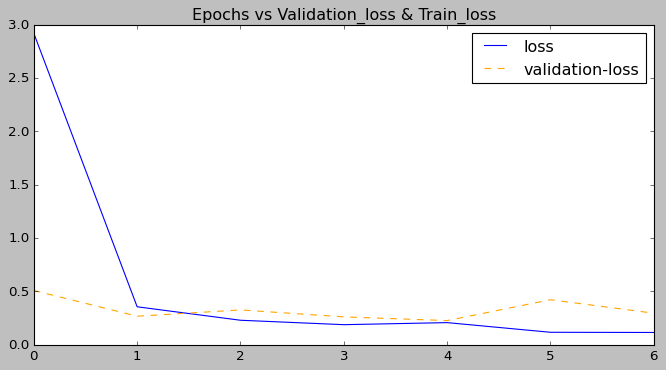

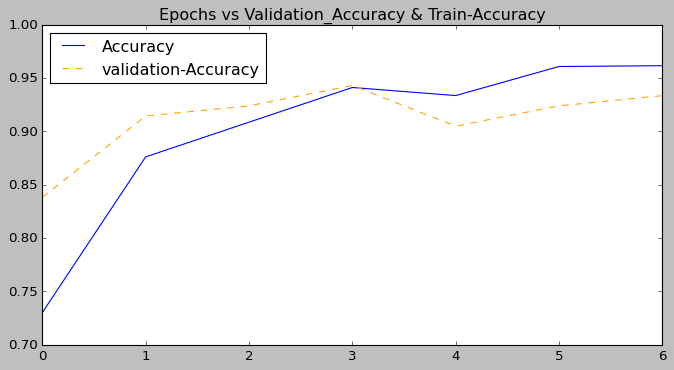

In [17]:
evaluate_model("DenseNet121", model, a_valid, a_test, histdata, elapsed)

In [18]:
from google.colab import files
files.download('./drive/MyDrive/DenseNet121.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>